In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# بارگذاری دادهها

file_path = r'C:\Users\USER\Desktop\data mining.git\python\data-Kyphosis .csv'
data = pd.read_csv(file_path)
print(data)


   Kyphosis  Age  Number  start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
75   absent  178       4     15
76   absent  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79   absent   42       7      6

[80 rows x 4 columns]


In [29]:
# پیشپردازش دادهها
data['Kyphosis'] = data['Kyphosis'].map({'absent': 0, 'present': 1})

In [30]:
# بررسی نرمال بودن دادهها
print(shapiro(data['Age']))
print(shapiro(data['Number']))
print(shapiro(data['start']))

ShapiroResult(statistic=0.939436147650737, pvalue=0.0008984080594016217)
ShapiroResult(statistic=0.8903743183887992, pvalue=4.888467608395821e-06)
ShapiroResult(statistic=0.8749198595809915, pvalue=1.2324173371799275e-06)


In [31]:
# نرمالسازی دادهها با استفاده از تبدیل log
data['Age'] = np.log(data['Age'] + 1)
data['Number'] = np.log(data['Number'] + 1)
data['Start'] = np.log(data['start'] + 1)

In [32]:
# خوشهبندی K-means
kmeans = KMeans(n_clusters=3, random_state=123)
data['Cluster'] = kmeans.fit_predict(data[['Age', 'Number', 'start']])
print(data['Cluster'].value_counts())

Cluster
0    50
2    17
1    13
Name: count, dtype: int64


In [33]:

# جدول مقایسه خوشهها با Kyphosis
print(pd.crosstab(data['Kyphosis'], data['Cluster']))


Cluster    0  1   2
Kyphosis           
0         47  7  12
1          3  6   5


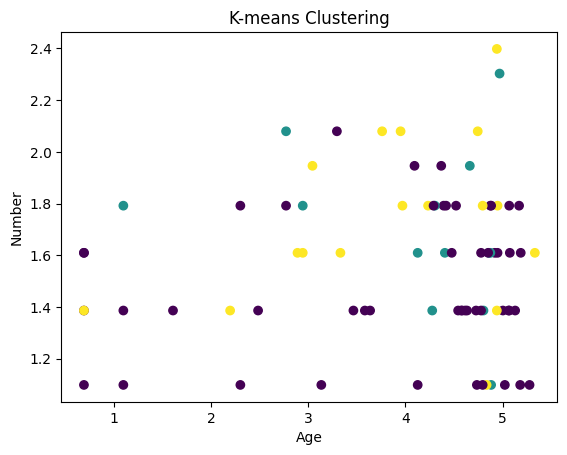

In [34]:
# نمایش نتایج خوشهبندی
plt.scatter(data['Age'], data['Number'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('K-means Clustering')
plt.show()

In [35]:
# خوشهبندی PAM
from sklearn_extra.cluster import KMedoids

In [36]:
kmedoids = KMedoids(n_clusters=3, random_state=123)
data['PAM_Cluster'] = kmedoids.fit_predict(data[['Age', 'Number', 'Start']])
print(data['PAM_Cluster'].value_counts())

PAM_Cluster
0    31
2    26
1    23
Name: count, dtype: int64


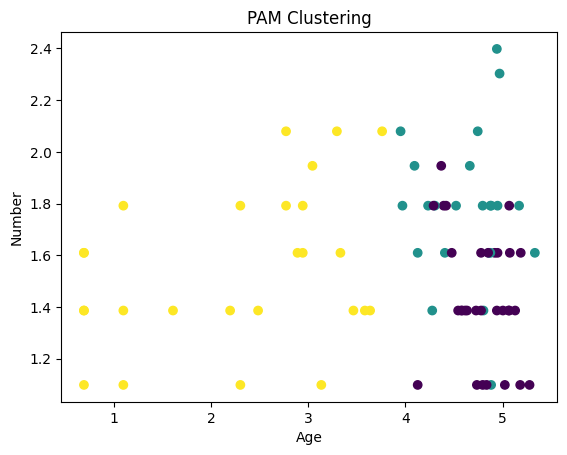

In [37]:
# نمایش نمودار PAM
plt.scatter(data['Age'], data['Number'], c=data['PAM_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('PAM Clustering')
plt.show()

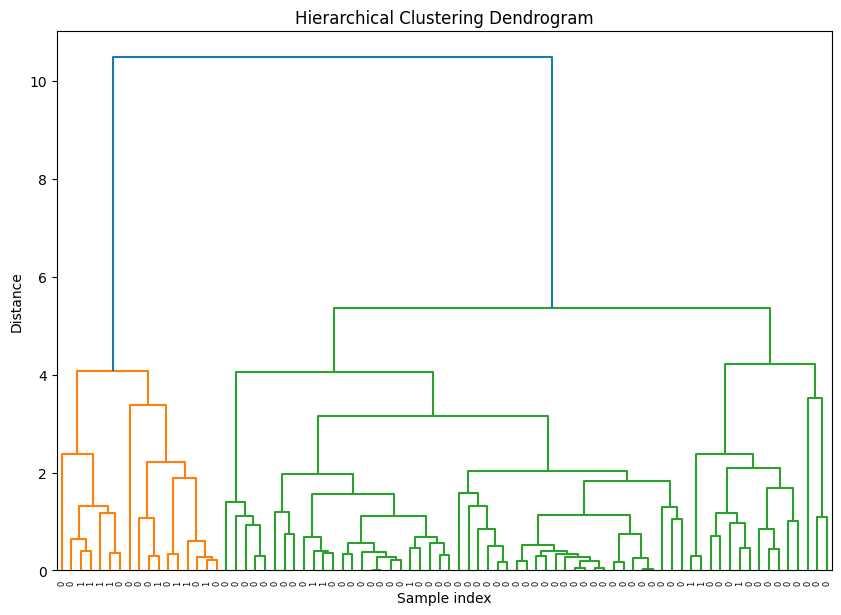

In [38]:
# خوشهبندی Hierarchical
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(data[['Age', 'Number', 'start']], method='average')
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['Kyphosis'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [39]:
# خوشهبندی DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.42, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data[['Age', 'Number', 'Start']])
print(pd.crosstab(data['Kyphosis'], data['DBSCAN_Cluster']))

DBSCAN_Cluster  -1   0
Kyphosis              
0               31  35
1                9   5


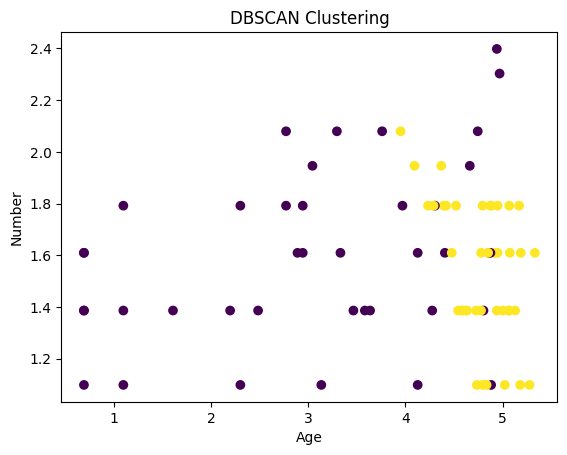

In [40]:
# نمایش نتایج DBSCAN
plt.scatter(data['Age'], data['Number'], c=data['DBSCAN_Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('DBSCAN Clustering')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# مدلسازی با درخت تصمیم
X = data[['Age', 'Number', 'start']]
y = data['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.00      0.00      0.00         3

    accuracy                           0.79        24
   macro avg       0.43      0.45      0.44        24
weighted avg       0.76      0.79      0.77        24



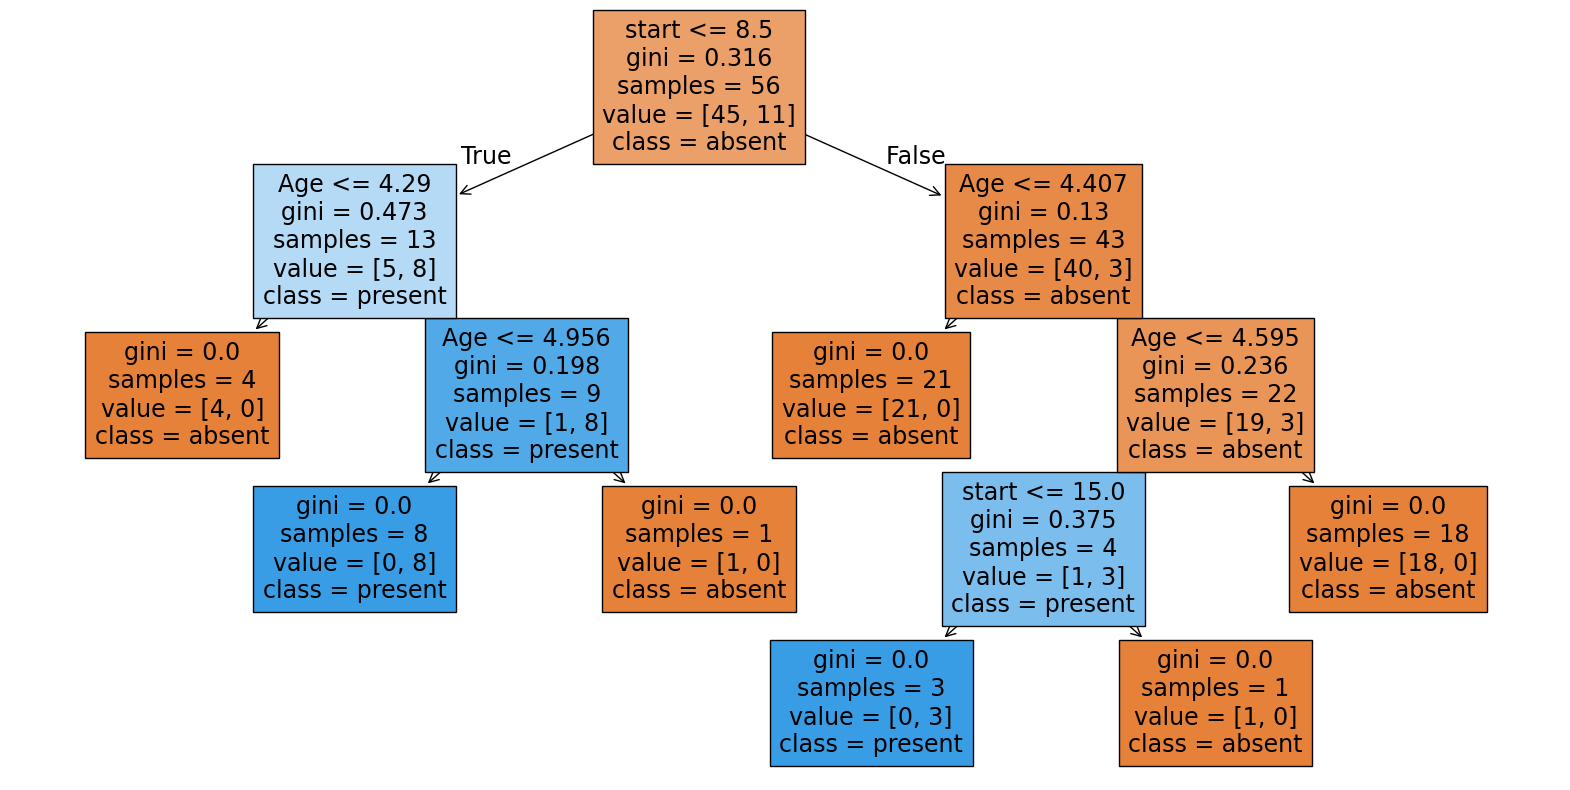

In [43]:
# نمایش درخت تصمیم
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=['Age', 'Number', 'start'], class_names=['absent', 'present'])
plt.show()

In [44]:
# مدلسازی جنگل تصادفی
rf = RandomForestClassifier(n_estimators=100, random_state=5678)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[19  2]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.00      0.00      0.00         3

    accuracy                           0.79        24
   macro avg       0.43      0.45      0.44        24
weighted avg       0.76      0.79      0.77        24



In [45]:
import statsmodels.api as sm

# مدلسازی رگرسیونی
X = data[['Number', 'Start']]
X = sm.add_constant(X)  # اضافه کردن ثابت به مدل
y = data['Age']

model = sm.OLS(y, X).fit()
print(model.summary())  # نمایش خلاصه مدل رگرسیونی

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.3731
Date:                Wed, 28 Aug 2024   Prob (F-statistic):              0.690
Time:                        14:25:00   Log-Likelihood:                -135.74
No. Observations:                  80   AIC:                             277.5
Df Residuals:                      77   BIC:                             284.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0512      1.208      2.525      0.0

In [46]:
# بررسی VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# محاسبه VIF برای هر متغیر
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

  feature        VIF
0   const  64.511918
1  Number   1.133833
2   Start   1.133833


In [47]:
# محاسبه همبستگی
cor_matrix = data[['Kyphosis', 'Age', 'Number', 'Start']].corr()
print(cor_matrix)

          Kyphosis       Age    Number     Start
Kyphosis  1.000000  0.202997  0.306273 -0.402710
Age       0.202997  1.000000  0.093463 -0.004537
Number    0.306273  0.093463  1.000000 -0.343563
Start    -0.402710 -0.004537 -0.343563  1.000000


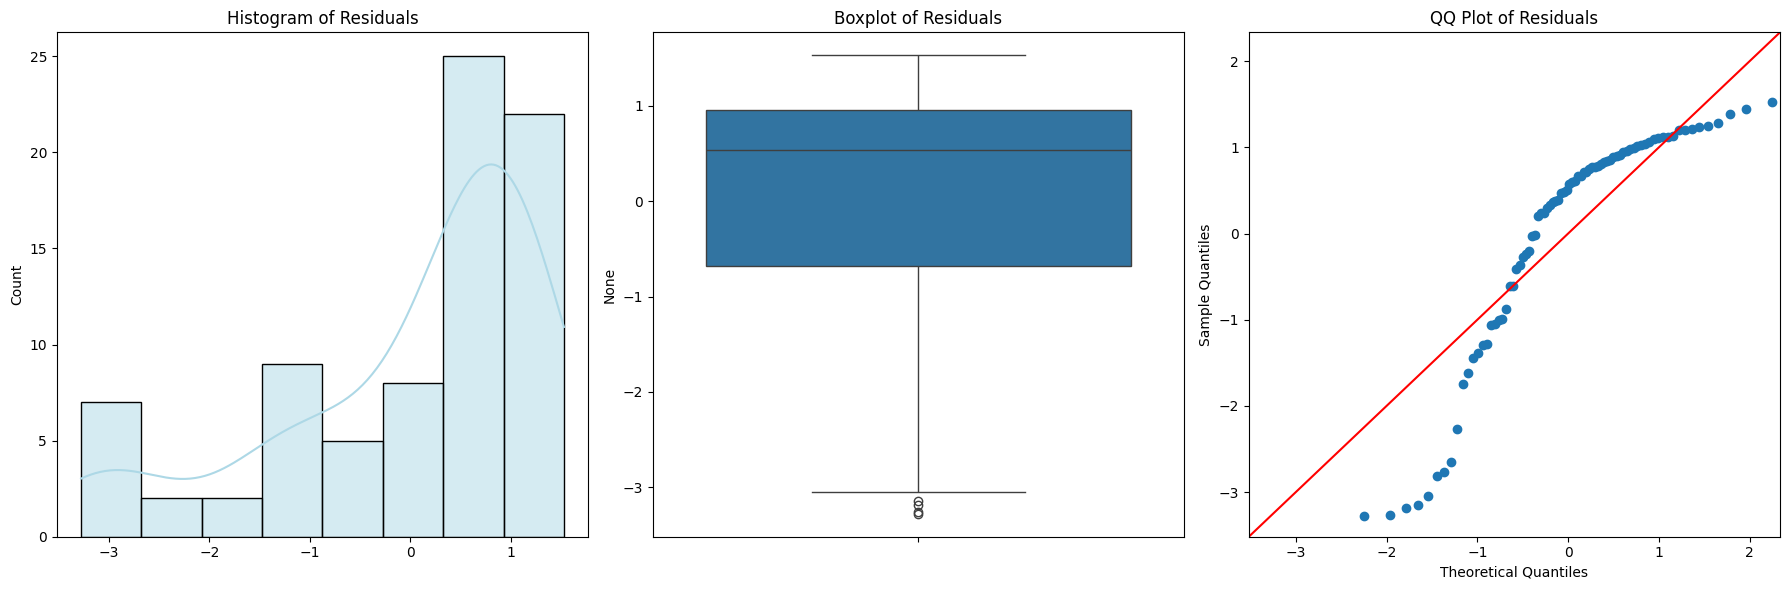

In [48]:
# نمودارهای باقیمانده
residuals = model.resid
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# هیستوگرام باقیماندهها
sns.histplot(residuals, kde=True, ax=ax[0], color='lightblue')
ax[0].set_title('Histogram of Residuals')

# باکسپلات باقیماندهها
sns.boxplot(y=residuals, ax=ax[1])
ax[1].set_title('Boxplot of Residuals')

# نمودار QQ
sm.qqplot(residuals, line='45', ax=ax[2])
ax[2].set_title('QQ Plot of Residuals')

plt.tight_layout()
plt.show()

In [49]:
# آزمون شاپیرو-ویلک برای نرمال بودن باقیماندهها
print(shapiro(residuals))

ShapiroResult(statistic=0.837888994796685, pvalue=6.486504400106743e-08)
